<a href="https://colab.research.google.com/github/shuvayanb/Phiflow_validation/blob/main/Taylor_Green_vortex_decay_Re_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size="6">Taylor Green vortex decay</font>

We will use this Jupyter Notebook to simulate the Taylor-Green vortex decay problem ([Orszag 1974](https://link.springer.com/content/pdf/10.1007/3-540-06769-8_4.pdf)). This test case provides an analytical solution of the turbulent decay, energy dissipation mechanism, etc. and is used as a benchmark test case for validating an incompressible viscous fluid solver.  


The exact form of the velocity field as a function of spatial and temporal coordinates are shown below, which is solved numerically at time $t=0$ units in a domain $\Omega_1$ = $2\pi \times 2\pi$ discretised by 40 $\times$ 40 control volumes. 

\begin{equation}
	u(x, y, t) = -u_\mathrm{0} \mathrm{cos}(x) \ \mathrm{sin}(y) \ \mathrm{exp}\Big(-2 \nu t \Big)
\end{equation}\begin{equation}
	v(x, y, t) = -u_\mathrm{0} \mathrm{sin}(x) \ \mathrm{cos}(y) \ \mathrm{exp}\Big(-2 \nu t \Big)
\end{equation}

$u$-velocity field at time $t$ = 0 units
![](https://raw.githubusercontent.com/shuvayanb/files_folders/main/TGV_vel_x.png)

$v$-velocity field at time $t$ = 0 units
![](https://raw.githubusercontent.com/shuvayanb/files_folders/main/TGV_vel_y.png)

In [ ]:
#!pip uninstall phiflow
!pip install --upgrade --quiet git+https://github.com/tum-pbs/PhiFlow@develop
from phi.flow import*
from phi import __version__
import scipy; scipy.__version__
import numpy; numpy.__version__

print("Phiflow version: {}".format(phi.__version__))
print("Numpy version: {}".format(numpy.__version__))
print("Scipy version: {}".format(scipy.__version__))

     |████████████████████████████████| 38.1 MB 1.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
Phiflow version: 2.1.2
Numpy version: 1.21.6
Scipy version: 1.7.3


As alluded to earlier, we will use a $\texttt{centered_grid}$ of size 40 $\times$ 40 to discretise the computational domain. While this test case would work fine with a $\texttt{staggered_grid}$ as well, we use a $\texttt{centered_grid}$ for a change. The flow is initialised with the exact solution and solved until a total time of $T$ = 30 units with a time-step size $\Delta t$ = 0.01. For the present problem, the physical viscosity of the flow $\nu$ acts as a mechanism for dissipation of the flow. The kinematic viscosity of the flow  is taken as $\nu$ = $\pi/100$. This results in a Reynolds number of $Re$ = 10, defined as:

$$ Re = \frac{2 \pi u_\mathrm{0}}{\nu} = 10$$

In [ ]:
N = 40 # number of control volumes

T = 30 # total time in seconds
DT = 0.01 # time steps
STEPS = int(T/DT) # number of time steps

NU = math.pi/100 # Viscosity is zero considering inviscid flow

Uo = 0.05

t = 0
Re = 2*math.pi*Uo/NU; # Reynolds number
L = np.pi*2 # Length of the boundary in either side of the computational domain


LL = 0
UL = 2*math.pi

def pressure(x, q=1, t=0, Re=10):
    return math.sum(math.cos(2 * x * q), 'vector') / 4 * math.exp(-4 * q**2 * t / Re)

def velocity(x, q=1, t=0, Re=10):
    sin = math.sin(q*x)
    cos = math.cos(q*x)
    vec = math.stack([-Uo * cos.vector['x'] * sin.vector['y'] , Uo * sin.vector['x'] * cos.vector['y']], dim=channel(vector='x,y'))
    return math.exp(-2*NU*t) * vec

DOMAIN = dict(x=N, y=N, bounds=Box[LL:UL, LL:UL], extrapolation=extrapolation.PERIODIC)
p0 = CenteredGrid(pressure, **DOMAIN)
v0 = CenteredGrid(velocity, **DOMAIN)


print("The Reynolds number is : {}".format(Re))
print("The grid spacing is : {}".format(L/N))

#vis.plot(v0*5)
#vis.plot(v0.vector['x'])
#vis.plot(v0.vector['y'])
#vis.show()


The Reynolds number is : 10.0
The grid spacing is : 0.15707963267948966


In [ ]:
velocities = [v0]
pressures = [p0]
age = 0.0
for i in range(STEPS):
    v1 = diffuse.explicit(velocities[-1], NU, DT)
    v2 = advect.semi_lagrangian(v1, v1, DT)
    v3,p3 = fluid.make_incompressible(v2,(), Solve('CG', 1e-5, 1e-5, x0=None))
    age += DT
    if i%100==0:
        print("Simulated time: {:0.4} units , remaining {:0.3} (%)".format(age, (T-age)*100/T))
        
    velocities.append(v3)
    pressures.append(p3)

    

Simulated time: 0.01 units , remaining 1e+02 (%)
Simulated time: 1.01 units , remaining 96.6 (%)
Simulated time: 2.01 units , remaining 93.3 (%)
Simulated time: 3.01 units , remaining 90.0 (%)
Simulated time: 4.01 units , remaining 86.6 (%)
Simulated time: 5.01 units , remaining 83.3 (%)
Simulated time: 6.01 units , remaining 80.0 (%)
Simulated time: 7.01 units , remaining 76.6 (%)
Simulated time: 8.01 units , remaining 73.3 (%)
Simulated time: 9.01 units , remaining 70.0 (%)
Simulated time: 10.01 units , remaining 66.6 (%)
Simulated time: 11.01 units , remaining 63.3 (%)
Simulated time: 12.01 units , remaining 60.0 (%)
Simulated time: 13.01 units , remaining 56.6 (%)
Simulated time: 14.01 units , remaining 53.3 (%)
Simulated time: 15.01 units , remaining 50.0 (%)
Simulated time: 16.01 units , remaining 46.6 (%)
Simulated time: 17.01 units , remaining 43.3 (%)
Simulated time: 18.01 units , remaining 40.0 (%)
Simulated time: 19.01 units , remaining 36.6 (%)
Simulated time: 20.01 units ,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: SyntaxWarning: Slicing a Tensor with a tuple or list should only be used for channel dimensions. Use a dict or the special slicing syntax tensor.dim[slice] instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: SyntaxWarning: Slicing a Tensor with a tuple or list should only be used for channel dimensions. Use a dict or the special slicing syntax tensor.dim[slice] instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: SyntaxWarning: Slicing a Tensor with a tuple or list should only be used for channel dimensions. Use a dict or the special slicing syntax tensor.dim[slice] instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: SyntaxWarning: Slicing a Tensor with a tuple or list should only be used for channel dimensions. Use a dict or the special slicing syntax tensor.dim[slice] instead


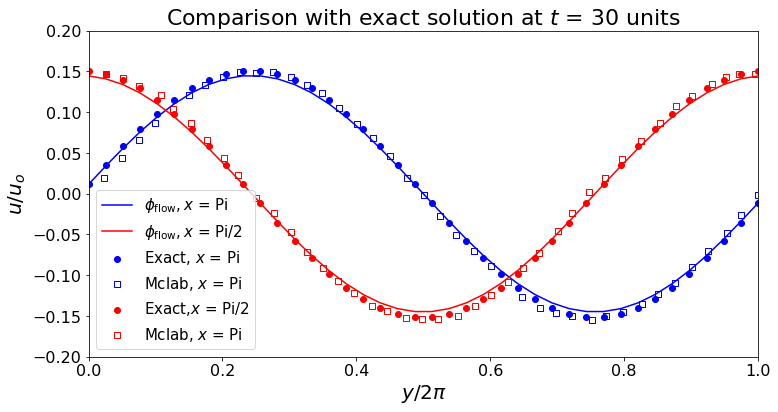

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib.font_manager as font_manager

import numpy as np
import pandas as pd

url_1 = 'https://raw.githubusercontent.com/shuvayanb/files_folders/main/Mclab_ux.csv'
df1 = pd.read_csv(url_1,delimiter = ',', encoding='unicode_escape')
df1.head()

url_2 = 'https://raw.githubusercontent.com/shuvayanb/files_folders/main/Mclab_uy.csv'
df2 = pd.read_csv(url_2,delimiter = ',', encoding='unicode_escape')
df2.head()


u_Mclab = np.array(df1)
v_Mclab = np.array(df2)

x_M = u_Mclab[:,0]
Vx_M = u_Mclab[:,1]

y_M = v_Mclab[:,0]
Vy_M = v_Mclab[:,1]



font = font_manager.FontProperties(family='Times New Roman', weight='normal', style='normal', size=15)
csfont = {'fontname':'Times New Roman'}


def vel_exact(x, t=T):
    sin = math.sin(x)
    cos = math.cos(x)
    vec = math.stack([-Uo * cos.vector['x'] * sin.vector['y'] , Uo * sin.vector['x'] * cos.vector['y']], dim=channel(vector='x,y'))
    return math.exp(-2*NU*t) * vec

vT = CenteredGrid(vel_exact, **DOMAIN)

div1 = 20
div2 = 10

ux_pi = np.asarray(velocities[-1].vector['x'].values[div1,:])
Vx_pi = np.asarray(vT.vector['x'].values[div1,:])

uy_pi_2 = np.asarray(velocities[-1].vector['y'].values[div2,:])
Vy_pi_2 = np.asarray(vT.vector['y'].values[div2,:])


y_2_pi = np.linspace(0,L,N)

plt.figure(figsize=(12,6))

plt.plot(y_2_pi/(math.pi*2), ux_pi/Uo, label = '$\phi_{\mathrm{flow}}, x$ = Pi', color='blue')
plt.scatter(y_2_pi/(math.pi*2), Vx_pi/Uo, label = 'Exact, $x$ = Pi', color='blue')
plt.scatter(x_M, Vx_M, marker = 's', facecolors='none', edgecolors='b', label = 'Mclab, $x$ = Pi', color='blue')

plt.plot(y_2_pi/(math.pi*2), uy_pi_2/Uo, label = '$\phi_{\mathrm{flow}}, x$ = Pi/2' , color='red')
plt.scatter(y_2_pi/(math.pi*2), Vy_pi_2/Uo, label = 'Exact,$x$ = Pi/2', color='red')
plt.scatter(y_M, Vy_M, marker = 's', facecolors='none', edgecolors='r', label = 'Mclab, $x$ = Pi', color='blue')

plt.xlim(0,1.0)
plt.ylim(-0.2,0.2)

plt.title('Comparison with exact solution at $t$ = 30 units', fontsize = 22, **csfont)    
plt.xlabel('$y/2 \pi$',fontsize=20,**csfont)
plt.ylabel('$u/u_o$',fontsize=20, **csfont)
plt.tick_params(labelsize=16)
plt.legend(loc="best", prop=font)
plt.show()

Finally, we compare the quantitative comparison of the velocity field *i.e*., $\frac{u}{u_o}$ at $x$ = $\pi$ and at $x$ = $\pi$/2 above with analytical and existing solutions [Zhou, J.G. 2019](https://arxiv.org/pdf/1901.02716.pdf), page 7, Fig. 7), obtained on the same grid resolution and same instance of time. It is found that $\Phi_{\mathrm{flow}}$ flow does quite well in accurately reproducing the flowfield at the boundaries as well as capturing the local maxima and minima. How do the solution compare? To our estimate, using the existing grid resolution (i.e., 40 $\times$ 40) and $\Delta t$ = 0.01, renders quite an accurate solution. 

In [ ]:
vis.plot(velocities[-1]*100)
vis.show()

<Figure size 432x288 with 0 Axes>